# Notiz für Henry:
diese Datei ist dafür da das Neuronale Netz zu entwickeln. In einem Notebook kann man schneller Hyperparameter ändern und einfacher weitere kleine Änderungen vornehmen. Wenn das Gröbste steht können wir das Notebook einfach als .py Datei exportieren und sind happy

## Importieren der wichtigsten Pakete

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pandas as pd

2023-06-11 22:43:54.453123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# GPU Test
import tensorflow as tf

# Funktioniert momentan bei mir immernoch nicht
#if tf.test.is_gpu_available():
#   print("GPU is available")
#   print("GPU(s) that Tensorflow recognizes:", tf.config.list_physical_devices('GPU'))
#else:
#   print("GPU not available")
# Manuell auf CPU einschränken
tf.config.set_visible_devices([], 'GPU')

## Sinnvolle Funktionen

In [3]:
################################################################################################### 
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
###################################################################################################    

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        value = f'{cm[i, j]:.3f}'  # Runde den Wert auf 3 Dezimalstellen
        plt.text(j, i, value,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
################################################################################################### 
import matplotlib.cm as cm
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[n]).reshape((28,28)), cmap=cm.Greys, interpolation='nearest')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[n],obs_errors[n]))
            n += 1
            
################################################################################################### 

In [4]:
def evaluate(X_test, Y_test):
    # Make predictions on test data
    Y_pred = model.predict(X_test)
    # Calculate loss and accuracy
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(f"loss:     {loss:.3}")
    print(f"accuracy: {accuracy:.3}")

    # Compute the classification report
    report = classification_report(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
    print(report)
    
    # Plot probability of being zero for true !genre! and non-!genre!
    true_genre = np.where(np.argmax(Y_test, axis=1) == 0)[0]
    true_non_genre = np.where(np.argmax(Y_test, axis=1) != 0)[0]
    
    plt.figure()
    plt.hist(Y_pred[true_genre, 0], bins=50, color='red', label='True !genre!', alpha=0.5)
    plt.hist(Y_pred[true_non_genre, 0], bins=50, color='blue', label='True Non-!genre!', alpha=0.5)
    plt.xlabel('Probability of !hier genre einfügen!')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.legend()

    # Compute the confusion matrix
    confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(confusion_mtx, classes=range(10), normalize='true')  

## Laden der Daten
Am besten wir fügen das Genre in einer separaten Datei dem Datensatz hinzu und machen ab hier nur mit dem fertigen Datensatz weiter

## Convert target

In [5]:
csv_file = "../data/data_selected.csv"

df = pd.read_csv(csv_file)
df.columns

Index(['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Stream', 'Genre'],
      dtype='object')

In [6]:
features_drop = ['Genre', 'Unnamed: 0']
X = df.drop(features_drop, axis=1)
Y = df['Genre']

In [7]:
# One-Hot-Encoding durchführen
Y = pd.get_dummies(Y)

# label um One-Hot-Encoding hinterher wieder zu übersetzen
genre_mapping = Y.columns
label = []
for index, genre in enumerate(genre_mapping):
    label.append(genre)
    print("Genre", index, ":", genre)


Genre 0 : R&B
Genre 1 : afrobeats
Genre 2 : alternative rock
Genre 3 : blues
Genre 4 : christian
Genre 5 : christmas
Genre 6 : classic
Genre 7 : country
Genre 8 : cumbia
Genre 9 : disco
Genre 10 : electronic
Genre 11 : film score
Genre 12 : folk
Genre 13 : funk
Genre 14 : hip hop
Genre 15 : jazz
Genre 16 : latin
Genre 17 : metal
Genre 18 : mexican
Genre 19 : minimalist music
Genre 20 : new wave
Genre 21 : opera
Genre 22 : pagode
Genre 23 : pop
Genre 24 : reggae
Genre 25 : reggaeton
Genre 26 : rock
Genre 27 : sertanejo
Genre 28 : soul


## Splitten von Training und Test Datensätzen

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_val,  Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

## Daten skalieren

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modell
hier ein schönes Modell ergänzen

In [10]:
num_classes = len(Y.value_counts())

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))  # Neue Dense-Schicht mit 256 Einheiten hinzugefügt
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))  # Neue Dense-Schicht mit 512 Einheiten hinzugefügt
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], jit_compile=False)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               1

## Training

In [12]:
from keras.callbacks import EarlyStopping

batch_size = 64
nb_epoch = 200

# Definiere die Early Stopping-Bedingungen
early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=nb_epoch, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/200
85/85 [==============================] - 1s 4ms/step - loss: 2.6681 - accuracy: 0.2650 - val_loss: 2.4668 - val_accuracy: 0.3440
Epoch 2/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4454 - accuracy: 0.3178 - val_loss: 2.3374 - val_accuracy: 0.3517
Epoch 3/200
85/85 [==============================] - 0s 3ms/step - loss: 2.3549 - accuracy: 0.3452 - val_loss: 2.2472 - val_accuracy: 0.3642
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 2.3001 - accuracy: 0.3380 - val_loss: 2.2041 - val_accuracy: 0.3707
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 2.2522 - accuracy: 0.3463 - val_loss: 2.1444 - val_accuracy: 0.3819
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 2.2152 - accuracy: 0.3529 - val_loss: 2.1251 - val_accuracy: 0.3828
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 2.1807 - accuracy: 0.3614 - val_loss: 2.1176 - val_accuracy: 0.3789
Epoch 8/200
8

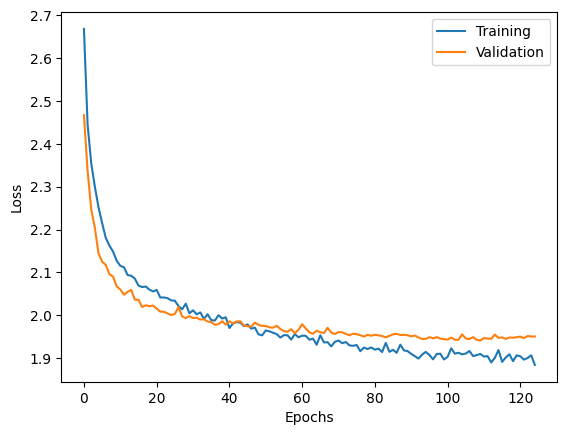

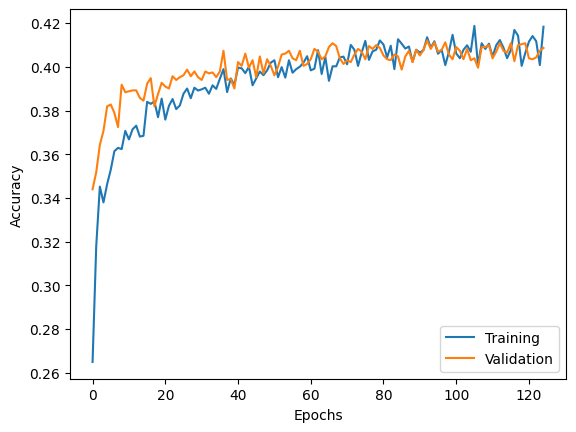

In [13]:
plot_history(hist)

## Vorhersage

In [14]:
Y_pred = model.predict(X_val)

73/73 [==============================] - 0s 579us/step


## Evaluation

In [15]:
# Überprüfung auf Spalte mit nur False-Werten
column_with_only_false = Y_val.columns[(Y_val == False).all()]

# Ausgabe der Spalten mit nur False-Werten
if not column_with_only_false.empty:
    print("Spalte mit nur False-Werten gefunden:", column_with_only_false)
else:
    print("Keine Spalte mit nur False-Werten gefunden.")

Keine Spalte mit nur False-Werten gefunden.


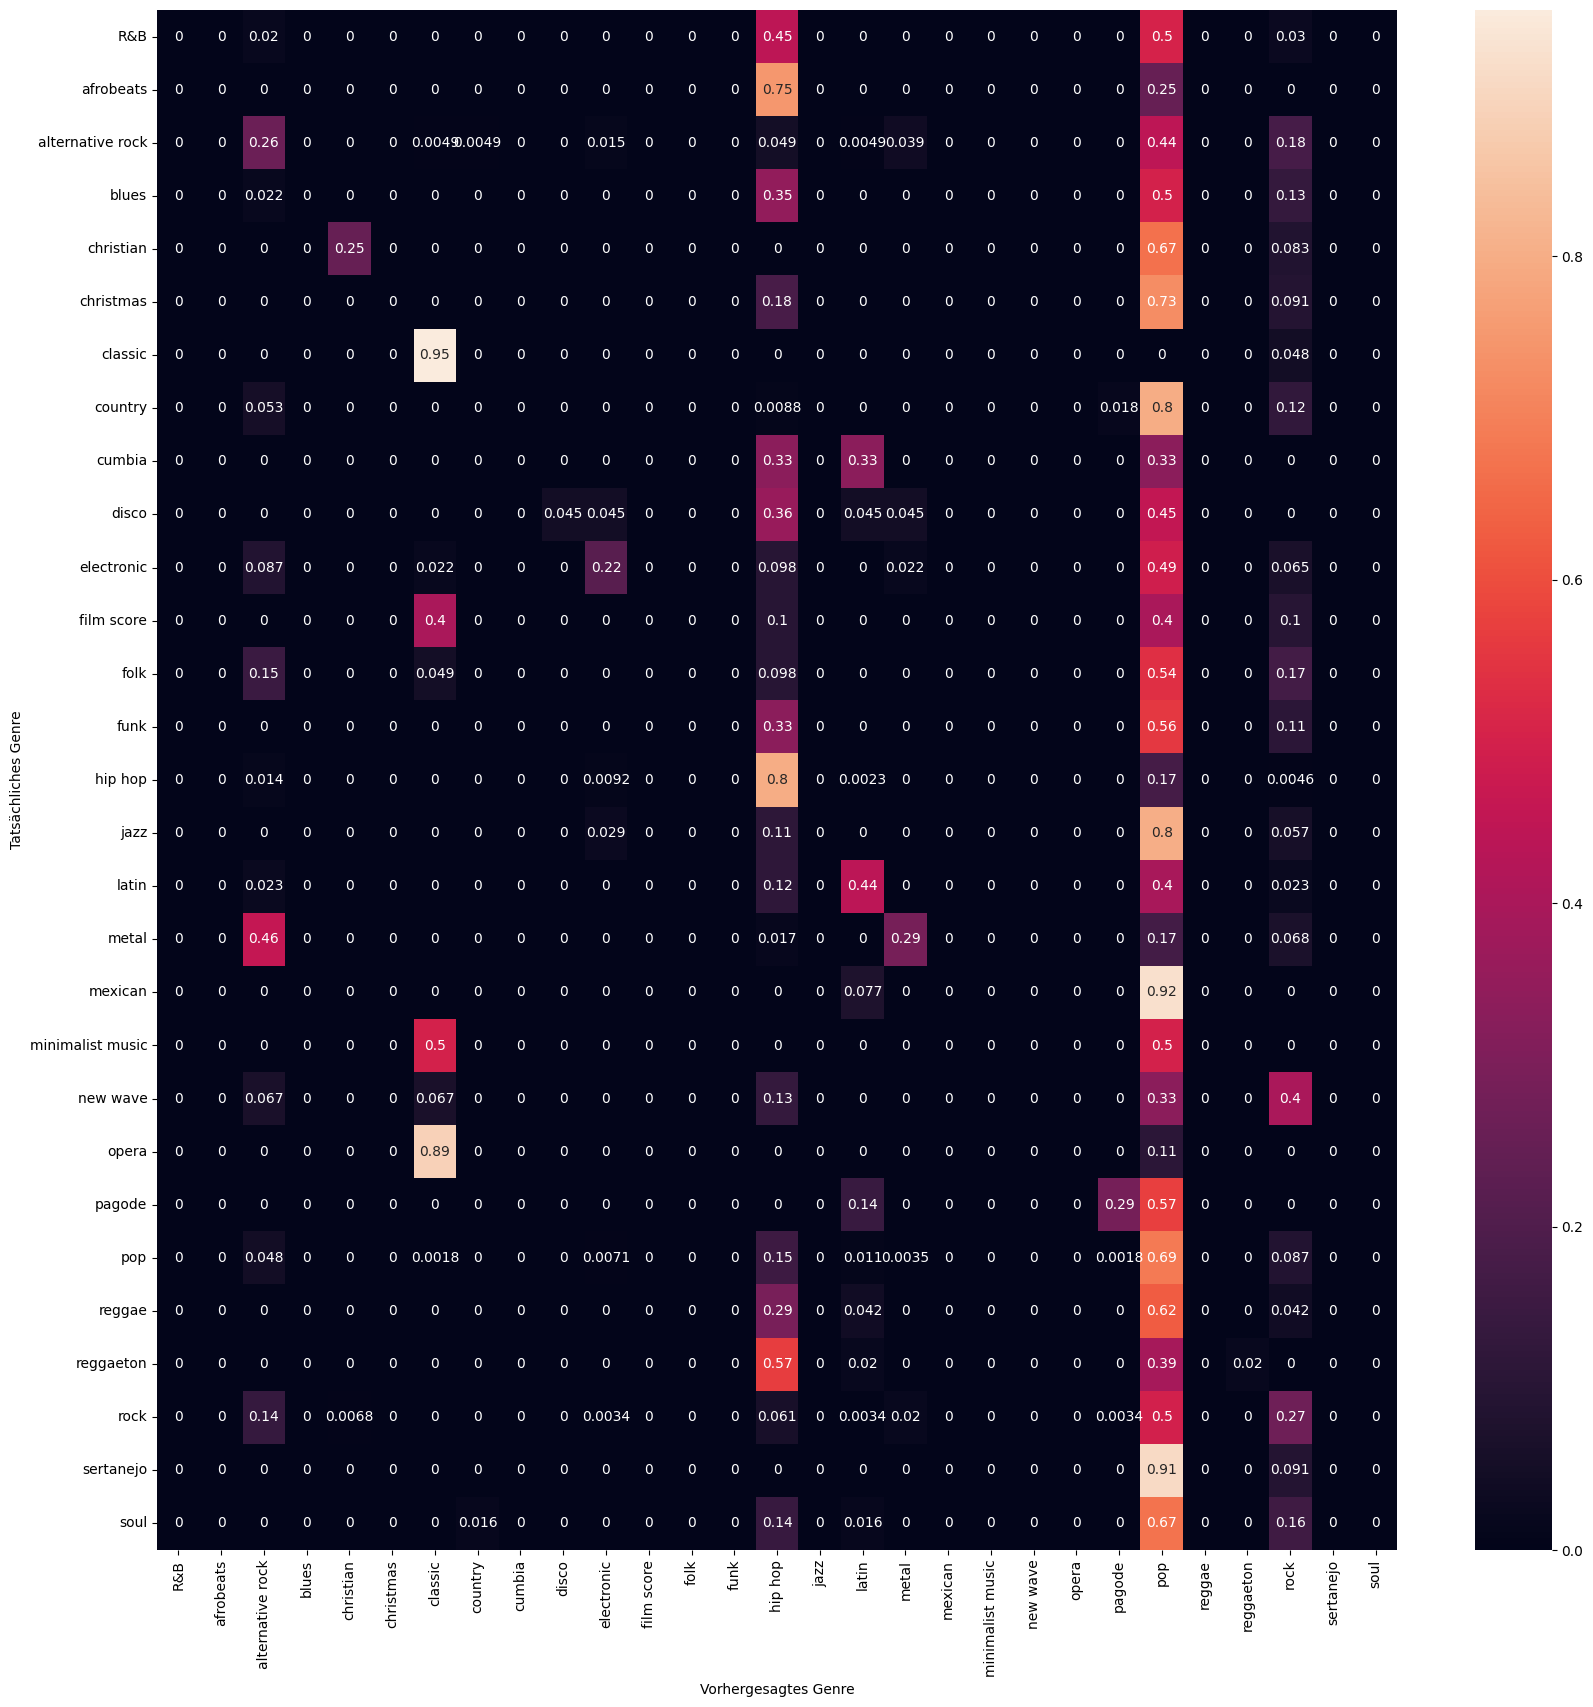

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_val_classes = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_val_classes, Y_pred_classes, normalize='true')
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)
plt.xlabel('Vorhergesagtes Genre')
plt.ylabel('Tatsächliches Genre')
plt.savefig('../figures/confusion_matrix.png')
plt.show()


104/104 [==============================] - 0s 513us/step
loss:     1.93
accuracy: 0.417
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.00      0.00      0.00        15
           2       0.28      0.23      0.26       273
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        13
           6       0.39      0.90      0.55        30
           7       0.00      0.00      0.00       175
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        36
          10       0.32      0.13      0.18       133
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        12
          14       0.57      0.81      0.67       632
          15       0.00      0.00      0.00    

/home/henry/anaconda3/envs/smd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/anaconda3/envs/smd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/anaconda3/envs/smd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


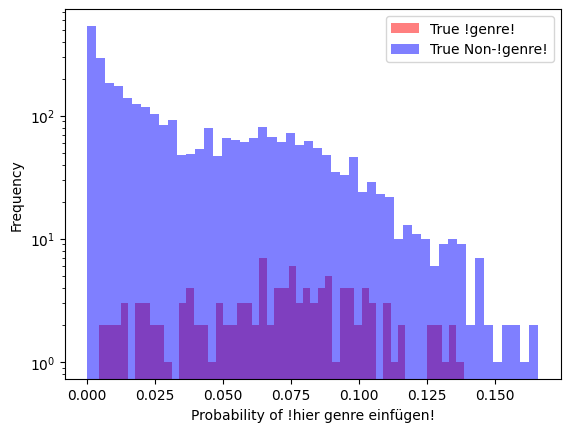

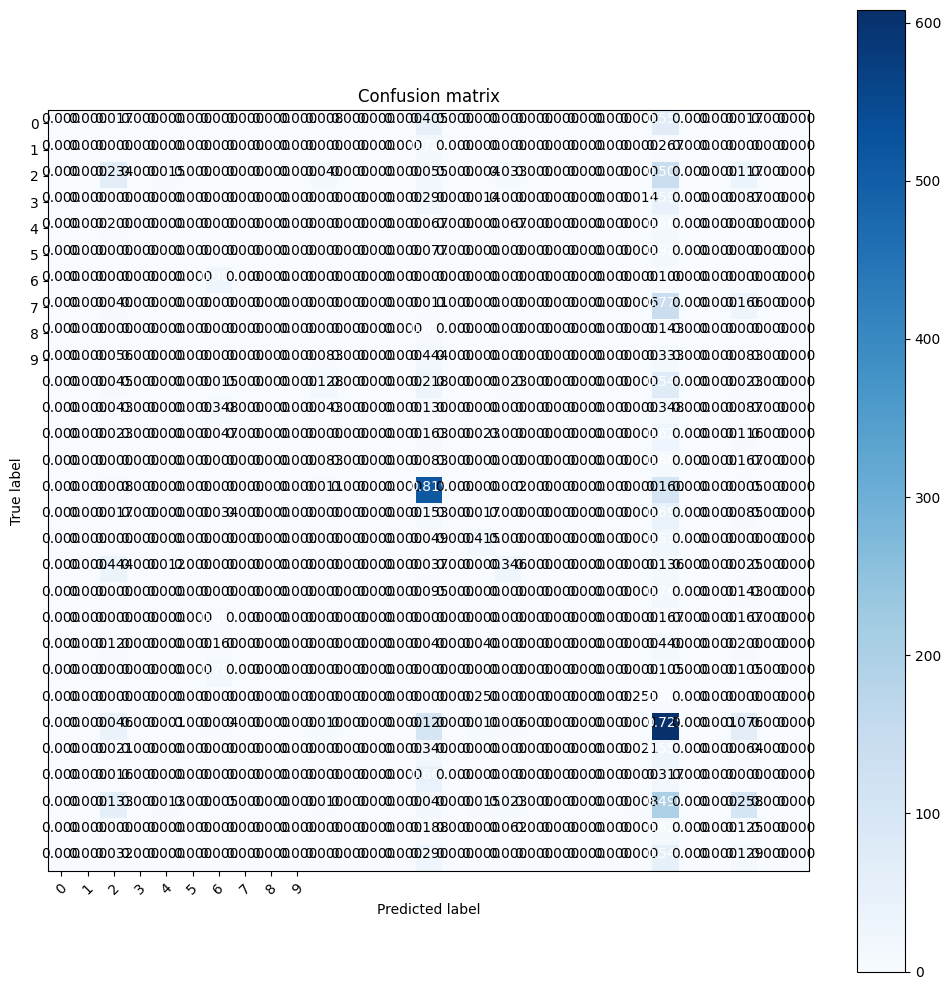

In [18]:
evaluate(X_test, Y_test)

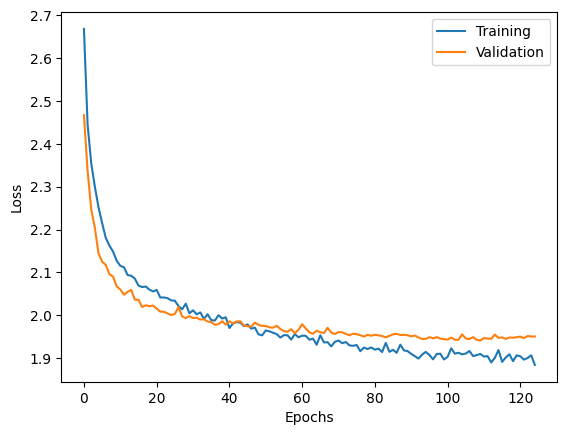

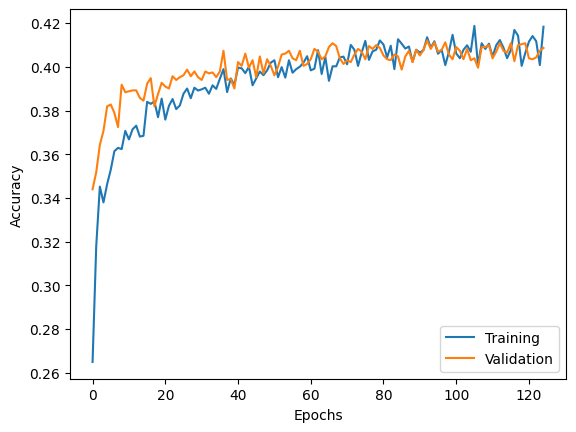

In [19]:
plot_history(hist)